In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [3]:
import holidays

kor_holiday = list(holidays.KOR(years = range(2019,2023)).keys())

temp_df = pd.DataFrame()
temp_df['사고일시'] = kor_holiday
temp_df['holiday'] = 1
temp_df.사고일시 = pd.to_datetime(temp_df.사고일시)

temp_df['day'] = temp_df.사고일시.dt.day
temp_df['month'] = temp_df.사고일시.dt.month
temp_df['year'] = temp_df.사고일시.dt.year

temp_df = temp_df.drop(columns='사고일시')

In [4]:
train_data['사고일시'] = pd.to_datetime(train_data['사고일시'])
test_data['사고일시'] = pd.to_datetime(test_data['사고일시'])

In [5]:
for df in [train_data,test_data]:
    df['hour'] = df.사고일시.dt.hour
    df['weekday'] = df.사고일시.dt.weekday
    df['day'] = df.사고일시.dt.day
    df['month'] = df.사고일시.dt.month
    df['year'] = df.사고일시.dt.year
    df['gu'] = df.시군구.apply(lambda x:x.split()[1])
    df['dong'] = df.시군구.apply(lambda x:x.split()[2])
    df['road1'] = df.도로형태.apply(lambda x:x.split()[0])
    df['road2'] = df.도로형태.apply(lambda x:x.split()[2])

In [6]:
train_data = pd.merge(train_data,temp_df,how = 'left',on =['day','month','year'])
test_data = pd.merge(test_data,temp_df,how = 'left',on =['day','month','year'])
train_data.holiday = train_data.holiday.fillna(0)
test_data.holiday = test_data.holiday.fillna(0)

In [7]:
train_data.loc[train_data['weekday'] >= 5, 'holiday'] = 1
test_data.loc[test_data['weekday'] >= 5, 'holiday'] = 1

In [8]:
train_data['시간대'] = train_data.hour.apply(lambda x:0 if 1<=x<7 else 1 if 7<=x<13 else 2 if 13<=x<19 else 3)
test_data['시간대'] = test_data.hour.apply(lambda x:0 if 1<=x<7 else 1 if 7<=x<13 else 2 if 13<=x<19 else 3)

In [9]:
train_data = pd.merge(train_data,train_data.groupby('dong')['gu'].count().reset_index().rename(columns={'gu':'acci_cnt'}),how='left',on='dong')
test_data = pd.merge(test_data,train_data.groupby('dong')['gu'].count().reset_index().rename(columns={'gu':'acci_cnt'}),how='left',on='dong')
# train_data = pd.merge(train_data,train_data.groupby('dong')['ECLO'].sum().reset_index().rename(columns={'ECLO':'acci'}),how='left',on='dong')
# test_data = pd.merge(test_data,train_data.groupby('dong')['ECLO'].sum().reset_index().rename(columns={'ECLO':'acci'}),how='left',on='dong')

In [11]:
group = ['dong']
result = ['사망자수', '중상자수', '경상자수', '부상자수']
for gr in group:
    for i in result:
        # train_data = pd.merge(train_data,train_data.groupby(f'dong')[f'{i}'].count().reset_index().rename(columns={f'{i}':f'{i}_{gr}_cnt'}),how='left',on=f'{gr}')
        # test_data = pd.merge(test_data,train_data.groupby(f'{gr}')[f'{i}'].count().reset_index().rename(columns={f'{i}':f'{i}_{gr}_cnt'}),how='left',on=f'{gr}')
        # train_data = pd.merge(train_data,train_data.groupby(f'{gr}')[f'{i}'].mean().reset_index().rename(columns={f'{i}':f'{i}_{gr}_mean'}),how='left',on=f'{gr}')
        # test_data = pd.merge(test_data,train_data.groupby(f'{gr}')[f'{i}'].mean().reset_index().rename(columns={f'{i}':f'{i}_{gr}_mean'}),how='left',on=f'{gr}')
        train_data = pd.merge(train_data,train_data.groupby(f'{gr}')[f'{i}'].sum().reset_index().rename(columns={f'{i}':f'{i}_{gr}_sum'}),how='left',on=f'{gr}')
        test_data = pd.merge(test_data,train_data.groupby(f'{gr}')[f'{i}'].sum().reset_index().rename(columns={f'{i}':f'{i}_{gr}_sum'}),how='left',on=f'{gr}')
# for i in result:
#     train_data = pd.merge(train_data,train_data.groupby(['시간대','holiday'])[f'{i}'].count().reset_index().rename(columns={f'{i}':f'{i}_tt_cnt'}),how='left',on=['시간대','holiday'])
#     test_data = pd.merge(test_data,train_data.groupby(['시간대','holiday'])[f'{i}'].count().reset_index().rename(columns={f'{i}':f'{i}_tt_cnt'}),how='left',on=['시간대','holiday'])
#     train_data = pd.merge(train_data,train_data.groupby(['시간대','holiday'])[f'{i}'].mean().reset_index().rename(columns={f'{i}':f'{i}_tt_mean'}),how='left',on=['시간대','holiday'])
#     test_data = pd.merge(test_data,train_data.groupby(['시간대','holiday'])[f'{i}'].mean().reset_index().rename(columns={f'{i}':f'{i}_tt_mean'}),how='left',on=['시간대','holiday'])
    # train_data = pd.merge(train_data,train_data.groupby(['시간대','holiday'])[f'{i}'].sum().reset_index().rename(columns={f'{i}':f'{i}_tt_sum'}),how='left',on=['시간대','holiday'])
    # test_data = pd.merge(test_data,train_data.groupby(['시간대','holiday'])[f'{i}'].sum().reset_index().rename(columns={f'{i}':f'{i}_tt_sum'}),how='left',on=['시간대','holiday'])
# for i in result:
#     train_data = pd.merge(train_data,train_data.groupby(['dong','holiday'])[f'{i}'].count().reset_index().rename(columns={f'{i}':f'{i}_aa_cnt'}),how='left',on=['dong','holiday'])
#     test_data = pd.merge(test_data,train_data.groupby(['dong','holiday'])[f'{i}'].count().reset_index().rename(columns={f'{i}':f'{i}_aa_cnt'}),how='left',on=['dong','holiday'])
#     train_data = pd.merge(train_data,train_data.groupby(['dong','holiday'])[f'{i}'].mean().reset_index().rename(columns={f'{i}':f'{i}_aa_mean'}),how='left',on=['dong','holiday'])
#     test_data = pd.merge(test_data,train_data.groupby(['dong','holiday'])[f'{i}'].mean().reset_index().rename(columns={f'{i}':f'{i}_aa_mean'}),how='left',on=['dong','holiday'])
    # train_data = pd.merge(train_data,train_data.groupby(['dong','holiday'])[f'{i}'].sum().reset_index().rename(columns={f'{i}':f'{i}_aa_sum'}),how='left',on=['dong','holiday'])
    # test_data = pd.merge(test_data,train_data.groupby(['dong','holiday'])[f'{i}'].sum().reset_index().rename(columns={f'{i}':f'{i}_aa_sum'}),how='left',on=['dong','holiday'])
# for i in result:
#     train_data = pd.merge(train_data,train_data.groupby(['dong','holiday','road1'])[f'{i}'].count().reset_index().rename(columns={f'{i}':f'{i}_bb_cnt'}),how='left',on=['dong','holiday','road1'])
#     test_data = pd.merge(test_data,train_data.groupby(['dong','holiday','road1'])[f'{i}'].count().reset_index().rename(columns={f'{i}':f'{i}_bb_cnt'}),how='left',on=['dong','holiday','road1'])
#     train_data = pd.merge(train_data,train_data.groupby(['dong','holiday','road1'])[f'{i}'].mean().reset_index().rename(columns={f'{i}':f'{i}_bb_mean'}),how='left',on=['dong','holiday','road1'])
#     test_data = pd.merge(test_data,train_data.groupby(['dong','holiday','road1'])[f'{i}'].mean().reset_index().rename(columns={f'{i}':f'{i}_bb_mean'}),how='left',on=['dong','holiday','road1'])
#     train_data = pd.merge(train_data,train_data.groupby(['dong','holiday','road1'])[f'{i}'].sum().reset_index().rename(columns={f'{i}':f'{i}_bb_sum'}),how='left',on=['dong','holiday','road1'])
#     test_data = pd.merge(test_data,train_data.groupby(['dong','holiday','road1'])[f'{i}'].sum().reset_index().rename(columns={f'{i}':f'{i}_bb_sum'}),how='left',on=['dong','holiday','road1'])
# for i in result:
#     train_data = pd.merge(train_data,train_data.groupby(['시간대','holiday','road1'])[f'{i}'].count().reset_index().rename(columns={f'{i}':f'{i}_cc_cnt'}),how='left',on=['시간대','holiday','road1'])
#     test_data = pd.merge(test_data,train_data.groupby(['시간대','holiday','road1'])[f'{i}'].count().reset_index().rename(columns={f'{i}':f'{i}_cc_cnt'}),how='left',on=['시간대','holiday','road1'])
#     train_data = pd.merge(train_data,train_data.groupby(['시간대','holiday','road1'])[f'{i}'].mean().reset_index().rename(columns={f'{i}':f'{i}_cc_mean'}),how='left',on=['시간대','holiday','road1'])
#     test_data = pd.merge(test_data,train_data.groupby(['시간대','holiday','road1'])[f'{i}'].mean().reset_index().rename(columns={f'{i}':f'{i}_cc_mean'}),how='left',on=['시간대','holiday','road1'])
#     train_data = pd.merge(train_data,train_data.groupby(['시간대','holiday','road1'])[f'{i}'].sum().reset_index().rename(columns={f'{i}':f'{i}_cc_sum'}),how='left',on=['시간대','holiday','road1'])
#     test_data = pd.merge(test_data,train_data.groupby(['시간대','holiday','road1'])[f'{i}'].sum().reset_index().rename(columns={f'{i}':f'{i}_cc_sum'}),how='left',on=['시간대','holiday','road1'])

In [12]:
train_data['serious_ratio'] = (train_data['사망자수_dong_sum']+train_data['중상자수_dong_sum'])/train_data.acci_cnt
test_data['serious_ratio'] = (test_data['사망자수_dong_sum']+test_data['중상자수_dong_sum'])/test_data.acci_cnt

In [13]:
train_data.columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수',
       '경상자수', '부상자수', 'ECLO', 'hour', 'weekday', 'day', 'month', 'year', 'gu',
       'dong', 'road1', 'road2', 'holiday', '시간대', 'acci_cnt', '사망자수_dong_sum',
       '중상자수_dong_sum', '경상자수_dong_sum', '부상자수_dong_sum', 'serious_ratio'],
      dtype='object')

In [14]:
test_x = test_data.drop(columns = ['ID','사고일시','요일','시군구','도로형태','weekday']).copy()
train_x = train_data[test_x.columns].copy()
train_y = train_data['ECLO'].copy()

In [15]:
from sklearn.preprocessing import LabelEncoder

categorical_features = list(train_x.dtypes[train_x.dtypes == "object"].index)
# 추출된 문자열 변수 확인
display(categorical_features)

for i in categorical_features:
    le = LabelEncoder()
    le=le.fit(train_x[i]) 
    train_x[i]=le.transform(train_x[i])
    
    for case in np.unique(test_x[i]):
        if case not in le.classes_: 
            le.classes_ = np.append(le.classes_, case) 
    test_x[i]=le.transform(test_x[i])
    
display(train_x.head())
display(test_x.head())

['기상상태', '노면상태', '사고유형', 'gu', 'dong', 'road1', 'road2']

,기상상태,노면상태,사고유형,hour,day,month,year,gu,dong,road1,road2,holiday,시간대,acci_cnt,사망자수_dong_sum,중상자수_dong_sum,경상자수_dong_sum,부상자수_dong_sum,serious_ratio
0,2,0,0,0,1,1,2019,7,40,2,5,1.0,3,131,3,31,116,28,0.259542
1,5,0,0,0,1,1,2019,1,4,2,5,1.0,3,678,3,148,790,73,0.222714
2,2,0,0,1,1,1,2019,6,66,2,5,1.0,0,604,0,145,708,76,0.240066
3,2,0,1,2,1,1,2019,4,79,2,5,1.0,0,426,1,90,422,67,0.213615
4,2,0,1,4,1,1,2019,3,129,2,5,1.0,0,825,3,205,862,112,0.252121


,기상상태,노면상태,사고유형,hour,day,month,year,gu,dong,road1,road2,holiday,시간대,acci_cnt,사망자수_dong_sum,중상자수_dong_sum,경상자수_dong_sum,부상자수_dong_sum,serious_ratio
0,2,0,0,1,1,1,2022,6,99,0,3,1.0,0,338,2,91,381,32,0.275148
1,2,0,0,1,1,1,2022,6,168,2,5,1.0,0,492,1,145,484,58,0.296748
2,2,0,1,4,1,1,2022,6,117,0,3,1.0,0,147,0,43,165,17,0.292517
3,2,0,1,4,1,1,2022,6,126,2,5,1.0,0,372,3,74,401,48,0.206989
4,2,0,1,6,1,1,2022,1,4,0,3,1.0,0,678,3,148,790,73,0.222714


In [16]:
df = pd.DataFrame()
from sklearn.metrics import mean_squared_log_error
from lightgbm import log_evaluation, early_stopping, LGBMRegressor
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

model = LGBMRegressor(random_state = 42)
X_train = train_x
y_train = np.log1p(train_y)
X_test = test_x
prediction = np.zeros((X_test.shape[0]))
rmsle_list = []
cnt = 0
for tr_idx, val_idx in kf.split(X_train, y_train):
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    model.fit(tr_x, tr_y, eval_set=(val_x, val_y),eval_metric='RMSE',callbacks=[early_stopping(stopping_rounds=50),log_evaluation()])
    pred = model.predict(val_x)

    rmsle = np.sqrt(mean_squared_log_error(np.expm1(val_y), np.expm1(pred)))
    rmsle_list.append(rmsle)
    
    sub_pred = np.array(model.predict(X_test)) / 5
    prediction += sub_pred
print(f'{model.__class__.__name__}의 5fold 평균 RMSLE는 {np.mean(rmsle_list)}')

[1]	valid_0's rmse: 0.451415	valid_0's l2: 0.203776
Training until validation scores don't improve for 50 rounds
[2]	valid_0's rmse: 0.450224	valid_0's l2: 0.202701
[3]	valid_0's rmse: 0.449317	valid_0's l2: 0.201886
[4]	valid_0's rmse: 0.448564	valid_0's l2: 0.20121
[5]	valid_0's rmse: 0.447955	valid_0's l2: 0.200664
[6]	valid_0's rmse: 0.447431	valid_0's l2: 0.200195
[7]	valid_0's rmse: 0.446988	valid_0's l2: 0.199798
[8]	valid_0's rmse: 0.446603	valid_0's l2: 0.199454
[9]	valid_0's rmse: 0.446381	valid_0's l2: 0.199256
[10]	valid_0's rmse: 0.446134	valid_0's l2: 0.199036
[11]	valid_0's rmse: 0.445926	valid_0's l2: 0.19885
[12]	valid_0's rmse: 0.445751	valid_0's l2: 0.198694
[13]	valid_0's rmse: 0.445486	valid_0's l2: 0.198458
[14]	valid_0's rmse: 0.445346	valid_0's l2: 0.198333
[15]	valid_0's rmse: 0.445196	valid_0's l2: 0.1982
[16]	valid_0's rmse: 0.445111	valid_0's l2: 0.198124
[17]	valid_0's rmse: 0.445061	valid_0's l2: 0.198079
[18]	valid_0's rmse: 0.445021	valid_0's l2: 0.19804

In [17]:
submit = pd.read_csv('./data/sample_submission.csv')

In [18]:
submit.ECLO = np.expm1(prediction)

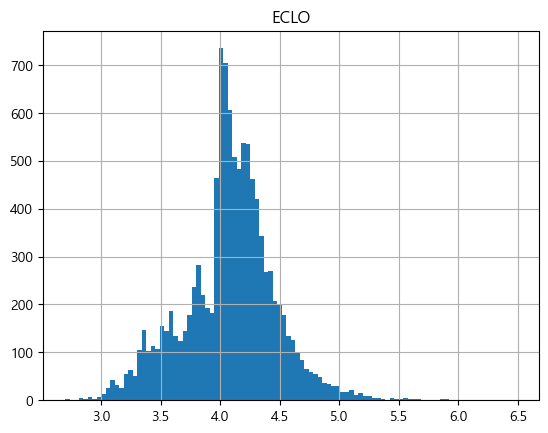

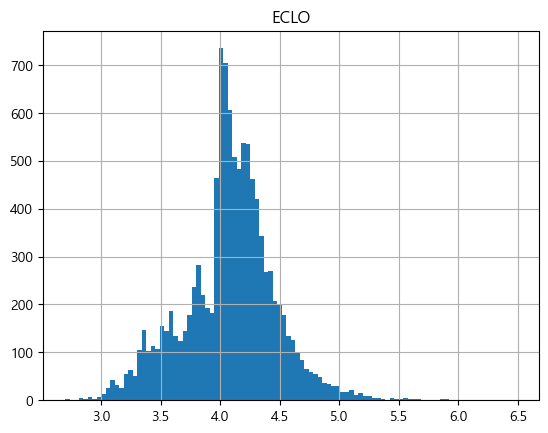

In [20]:
submit.hist(bins=100)
plt.show()
# pd.read_csv('./submission/1123.csv').hist(bins=100)
# plt.show()

In [81]:
submit.to_csv('./submission/1123.csv',index= False)

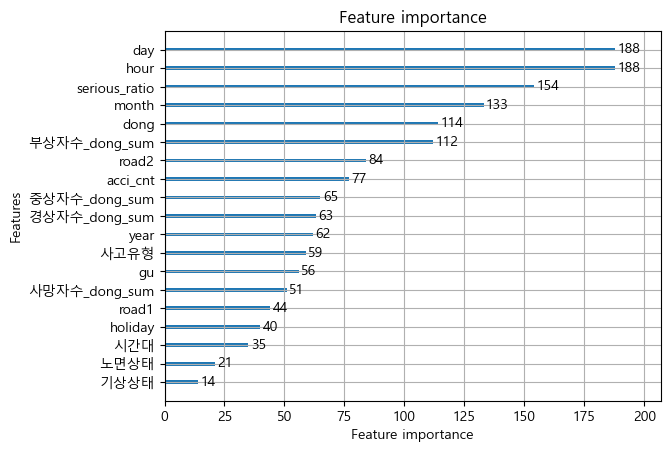

In [91]:
import lightgbm as lgb

# 중요도 시각화
lgb.plot_importance(model)  # 상위 10개 피쳐만 표시
plt.show()